# Image segmentation
The goal is to get a correct plant leaf form from the input image.

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## First method: segmentation by thresholding

In [35]:
def segmentation_by_thresholding(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (1600, 1600))
    image_b = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    thresholded_image = cv2.adaptiveThreshold(image_lab[:,:,1], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 69, 2)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    
    closing = cv2.morphologyEx(thresholded_image, cv2.MORPH_DILATE, kernel)
    
    contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    segmented_image = cv2.bitwise_and(image_b, image_b, mask=thresholded_image)
    
    leaf = np.zeros_like(thresholded_image)
    cv2.drawContours(leaf, [max(contours, key=cv2.contourArea)], -1, 255, 2)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(image_b)
    plt.title("Base image")
    
    plt.subplot(2, 3, 2)
    plt.imshow(image_lab[:,:,1])
    plt.title("LAB image")

    plt.subplot(2, 3, 3)
    plt.imshow(segmented_image)
    plt.title("Segmented image")

    plt.subplot(2, 3, 4)
    plt.imshow(thresholded_image, cmap="Greys_r")
    plt.title("Binary image")
    
    plt.subplot(2, 3, 5)
    plt.imshow(leaf, cmap="Greys_r")
    plt.title("leaf image")
    
    plt.show()

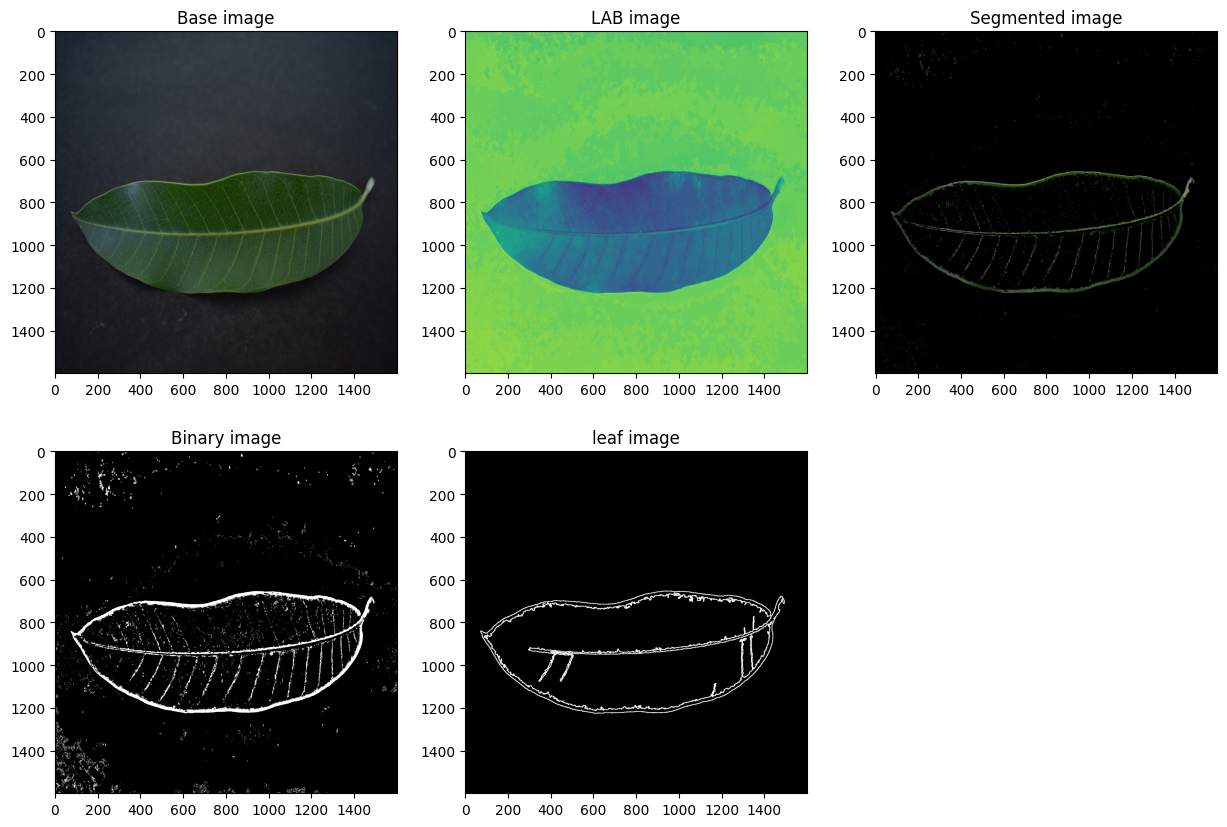

In [41]:
segmentation_by_thresholding("./../Downloads/Plant-leaves/Mango/0001_0046.JPG")

## Second method: segmentation by kmeans clustering

In [76]:
def segmentation_by_kmeans(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (1600, 1600))
    image_b = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    pixels = image_lab[:,:,1].flatten()
    pixels = np.float32(pixels)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    compactness, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_lab[:,:,1].shape)
    
    center_target = min(centers)
    binary_mask = np.where(segmented_image == center_target, 255, 0).astype(np.uint8)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_DILATE, kernel)

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    leaf = np.zeros_like(image_lab[:,:,1])

    cv2.drawContours(leaf, [max(contours, key=cv2.contourArea)], -1, 255, 2)

    segmented_image = cv2.bitwise_and(image_b, image_b, mask=binary_mask)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(image_b)
    plt.title("Base image")
    
    plt.subplot(2, 3, 2)
    plt.imshow(image_lab[:,:,1])
    plt.title("LAB image")

    plt.subplot(2, 3, 3)
    plt.imshow(segmented_image)
    plt.title("Segmented image")

    plt.subplot(2, 3, 4)
    plt.imshow(binary_mask, cmap="Greys_r")
    plt.title("Binary image")
    
    plt.subplot(2, 3, 5)
    plt.imshow(leaf, cmap="Greys_r")
    plt.title("leaf image")
    
    plt.show()

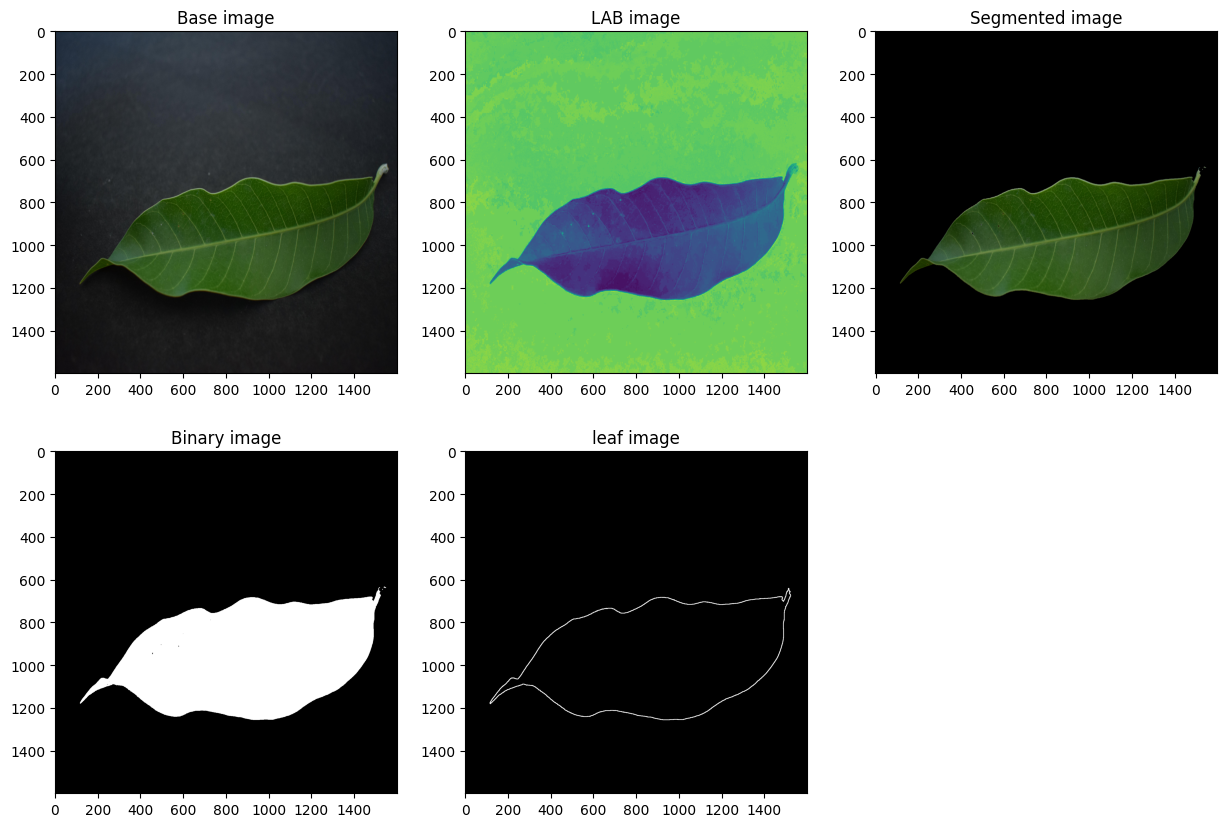

In [79]:
segmentation_by_kmeans("./../Downloads/Plant-leaves/Mango/0001_0056.JPG")